<a href="https://colab.research.google.com/github/YY-Official/YY-official/blob/master/%E3%81%84%E3%82%8D%E3%81%84%E3%82%8D%E3%81%8A%E8%A9%A6%E3%81%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Import Library

よく使うようなライブラリをここに記載


In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
%matplotlib inline
# To install seaborn type "pip install seaborn" to the anaconda terminal

# import sys
# !conda list Check the packages installed

# よく使うフォーマットまとめ


## グーグルドライブから読み込み


*   Google Colaborテキスト欄にMarkdownでGoogle Drive内にある画像を表示させる方法https://qiita.com/junkeymonkeybaby/items/a22fd1176c1b1a7c0f0b



### 説明


*   Google Colaborテキスト欄にMarkdownでGoogle Drive内にある画像を表示させる方法https://qiita.com/junkeymonkeybaby/items/a22fd1176c1b1a7c0f0b









### CSVをお試しで表示してみる

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/プログラミング関係/分析対象ファイル/ドライブテスト.xlsx', sheet_name=0,header=0, index_col=0)
#　格納変数名 = pd.read_excel('対象EXCELファイルのパス', sheet_name=ここにシート番号か名前を入力)

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
%load_ext google.colab.data_table

In [ ]:
#先頭5行を表示
df.head()

In [ ]:
# Excelファイルとして保存したい場合
df.to_excel('/content/drive/My Drive/Colab Notebooks/分析対象ファイル/ドライブテスト出力.xlsx')

In [ ]:
!pwd
# /content
# このipynbファイルのパスを表示

## 値･変数をインタラクティブに入れる方法

In [ ]:
variable_name = 0 #@param {type:"slider", min:0, max:100, step:1}

In [ ]:
variable_name = "sample1" #@param ["sample1", "sample2", "sample3"]

In [ ]:
variable_name = "" #@param {type:"string"}

In [ ]:
#@markdown ああ

# お試し

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

## オイラー法てテスト



In [ ]:
x = 1
O3 = 100
float(O3)
delta_t =0.01

for i in range(0,100):
    O3 = O3 -O3 * x * delta_t
    print(O3)




## 充填物の圧損3Dグラフ作成






* まず、matplotlib.pyplotをpipでインストールする
* Google colabでは日本語の軸を入力することができないため(リンク：https://colab.research.google.com/github/aquapathos/Semi3B/blob/master/HowToUseJapaneseOnColab.ipynb#scrollTo=W8_MOu_5zDTV)


In [ ]:
pip install japanize-matplotlib

*   matplotlibの使い方【基本から応用まで】(リンク：https://obgynai.com/matplotlib/)
*   matplotlibで3次元グラフの書き方の初歩的解説(リンク：https://qiita.com/orange_u/items/8a1e285a45093857aef7)
*   matplotlibでヒートマップや散布図等の使い方＆見た目調整(リンク：https://qiita.com/renesisu727/items/24fc4cd8fa2635b00a0d#%E3%83%92%E3%83%BC%E3%83%88%E3%83%9E%E3%83%83%E3%83%97)
*   matplotlibで3次元グラフのテーマカラー，グラフの表示角度を変更(リンク：https://qiita.com/knakajima3027/items/6d3ea41cdef96352cfc2)
*   matplotlibで使うことができる色のフォーマット(リンク：https://matplotlib.org/examples/color/colormaps_reference.html)
*   matplotlibで3Dグラフ表示,Axes3D 〜軸とカラーバーの表示〜(リンク：https://3pysci.com/python-3dplot-2/)



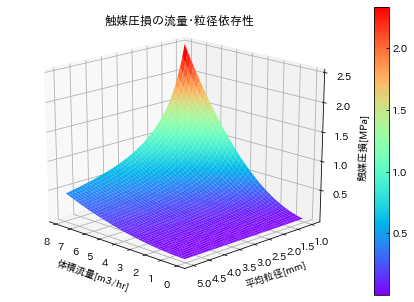

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files

fig = plt.figure()
ax = Axes3D(fig)

#X軸・Y軸の設定
u_V__hr = np.arange(0.1, 8, 0.1)  #X軸　体積流量[m_3/hr]
D__mm = np.arange(1, 5, 0.01)  #Y軸　平均粒径[mm]
u_V__hr, D__mm = np.meshgrid(u_V__hr, D__mm)  #メッシュを作る

#単位変換
u_V__s = u_V__hr / 60 / 60  #体積流量[m3/s]
D__m = D__mm / 1000  #平均粒径[m]

#変数入力、計算
fai_tank = 0.0763  #触媒充填塔外径[m]
t_tank = 0.003  #触媒充填塔厚み[m]
d_tank = fai_tank - 2 * t_tank  #触媒充填塔内径[m]
pi = np.pi  #円周率
S_tank = pi * (d_tank / 2) ** 2  #触媒充填塔断面積[m2]
L_tank = 0.46  #充填塔内充填長さ[m]
u_s__s = u_V__s / S_tank  #空塔速度[m/s]
nendo = 1.5  #粘度[mPa･s]
jyuten = 0.6   # 充填率
e = 1 - jyuten  # 気孔率
ro = 900  #密度[kg/m3]

#圧損の計算
Ergun_P = 150 * ((nendo / 1000 ) * u_s__s / (D__m ** 2)) * (((1 - e) ** 2) / (e ** 3) ) + 1.75 * (ro * (u_s__s ** 2 ) / D__m) * (((1 - e ) ** 1) / e ** 3 )  #エルガン式の1mあたりの圧損[Pa/m]
delta_P = Ergun_P * L_tank * (10 ** (-6))  #触媒充填塔の触媒粒子による圧損[MPa]

#matplotlibにてグラフの描画
surf = ax.plot_surface(u_V__hr, D__mm, delta_P, cmap='rainbow')  #(X軸,Y軸,Z軸,色の指定)
cbar = fig.colorbar(surf)
ax.set_title('触媒圧損の流量･粒径依存性')
ax.set_xlabel('体積流量[m3/hr]')
ax.set_ylabel('平均粒径[mm]')
ax.set_zlabel('触媒圧損[MPa]')

ax.view_init(elev=20, azim=135)   #視点角度の指定

plt.savefig("pic_download.png", format="png", dpi=300)

**グラフを画像に出力する**

*  Colaboratoryでグラフをファイルとして保存する：https://gensasaki.hatenablog.com/entry/2018/08/24/132221
*  ダウンロードする画像の解像度を指定するhttps://analytics-note.xyz/programming/matplotlib-save-dpi/




In [ ]:
files.download("pic_download.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 検算用コード



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


u_V__hr = 3  #X軸　体積流量[m_3/hr]
D__mm = 3  #Y軸　平均粒径[mm]


#単位変換
u_V__s = u_V__hr / 60 / 60  #体積流量[m3/s]
D__m = D__mm / 1000  #平均粒径[m]


fai_tank = 0.0763  #触媒充填塔外径[m]
t_tank = 0.003  #触媒充填塔厚み[m]
d_tank = fai_tank - 2 * t_tank  #触媒充填塔内径[m]
pi = np.pi  #円周率
S_tank = pi * (d_tank / 2) ** 2  #触媒充填塔断面積[m2]
L_tank = 0.46  #充填塔内充填長さ[m]
u_s__s = u_V__s / S_tank  #空塔速度[m/s]
nendo = 1.5  #粘度[mPa･s]
jyuten = 0.6   # 充填率
e = 1 - jyuten  # 気孔率
ro = 1000  #密度[kg/m3]



Ergun_P = 150 * ((nendo / 1000 ) * u_s__s / (D__m ** 2)) * (((1 - e) ** 2) / (e ** 3) ) + 1.75 * (ro * (u_s__s ** 2 ) / D__m) * (((1 - e ) ** 1) / e ** 3 )  #エルガン式の1mあたりの圧損[Pa/m]
delta_P = Ergun_P * L_tank * (10 ** (-6)) #触媒充填塔の触媒粒子による圧損[MPa]

print(delta_P)


0.1298410597505621
